<a href="https://colab.research.google.com/github/MGHiremath028/Machine-Learning/blob/main/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Wine Dataset Overview

The Wine dataset is a collection of data that contains information about various chemical properties of wine, which can be used for classification tasks. It is commonly used for machine learning projects, particularly in supervised learning, classification, and regression problems.

This dataset consists of samples of wines grown in the same region in Italy, but derived from three different cultivars. The dataset contains 178 samples with 13 features each, describing various chemical attributes of the wine, such as alcohol content, malic acid, ash content, and color intensity.

#### Features:
1. **Alcohol** – Alcohol content in the wine.
2. **Malic Acid** – A type of acid found in wine.
3. **Ash** – Ash content of the wine.
4. **Alcalinity of Ash** – Alkalinity level of the wine's ash.
5. **Magnesium** – Magnesium content.
6. **Total Phenols** – Total phenolic compounds in the wine.
7. **Flavanoids** – Amount of flavonoids (antioxidants) in the wine.
8. **Nonflavanoid Phenols** – Nonflavonoid phenolic compounds.
9. **Proanthocyanins** – Type of antioxidant found in wine.
10. **Color Intensity** – Intensity of the color of the wine.
11. **Hue** – Color attribute of the wine.
12. **OD280/OD315 of Diluted Wines** – Ratio of absorbance in the diluted wine.
13. **Proline** – An amino acid in the wine.

#### Target Variable:
- **Class**: The target variable is the wine cultivar, where the values are 0, 1, or 2 corresponding to the three different types of wines.


# Import necessary library

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load and prepare data


In [ ]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# Seperate X and Y

In [ ]:
X = df.drop('target',axis=1)
y = df['target']

# train test split

In [ ]:
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# SVM is sensitive to features scales,so normalize the data

In [ ]:
# Correct the variable assignment in train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# The rest of your code should work as intended now
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train the SVM model

In [ ]:
model = SVC(kernel='linear', C=1, random_state=42)  # You can experiment with 'rbf', 'poly', etc.
model.fit(X_train, y_train)


SVC(C=1, kernel='linear', random_state=42)

# Predict and Evaluate


In [ ]:
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9814814814814815

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Confusion Matrix:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]


# Parameter gris for SVC


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],              # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Kernel types
    'gamma': ['scale', 'auto'],          # Kernel coefficient for 'rbf' and 'poly'
    'degree': [2, 3, 4]                  # Degree of the polynomial kernel (used only with 'poly')
}


In [ ]:
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale

In [ ]:
# Fit to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale

## Prediction visualization
Visualizing predictions for a multi-class classification problem like the wine dataset is possible, but since the dataset has many features (13 in this case), it's not straightforward to plot in its original form. Here's how you can visualize your predictions effectively:



# Dimensionality Reduction and Visualization of SVM Predictions

## 1. Dimensionality Reduction for Visualization
When working with datasets that have many features, visualizing them in their original form is challenging. To make it possible, we can reduce the features to two or three dimensions using dimensionality reduction techniques:

- **Principal Component Analysis (PCA)**: A linear technique that projects the data onto directions of maximum variance.
- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A nonlinear technique that focuses on preserving the local structure of the data.

### Steps to Apply PCA:
1. Import PCA from `sklearn.decomposition`.
2. Reduce the features of the training and test datasets to 2D using `PCA(n_components=2)`.

---

## 2. Plot Decision Boundaries
To understand how the Support Vector Machine (SVM) model classifies different classes:
1. Use the 2D features obtained from PCA to train the SVM model.
2. Create a mesh grid over the feature space and predict labels for each grid point.
3. Visualize the decision boundaries by plotting the predictions as a background color map.
4. Overlay the actual data points on the plot, color-coded by their class labels.

### Steps to Plot Decision Boundaries:
1. Train the SVM model using PCA-transformed features.
2. Create a mesh grid using `numpy` to represent the feature space.
3. Predict the class for each grid point and reshape the predictions to match the grid shape.
4. Plot the decision boundaries using `matplotlib.pyplot.contourf` and overlay the data points using `scatter`.

---

This approach allows you to visualize the separation of classes and understand how the SVM model distinguishes between them.


In [ ]:
# Step 1: Apply PCA for Dimensionality Reduction
from sklearn.decomposition import PCA

# Reduce the dataset to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:
#Step 2: Train the Model on PCA-Transformed Data
# Train SVM on the reduced data
model = SVC(kernel='linear', C=1)
model.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = model.predict(X_test_pca)


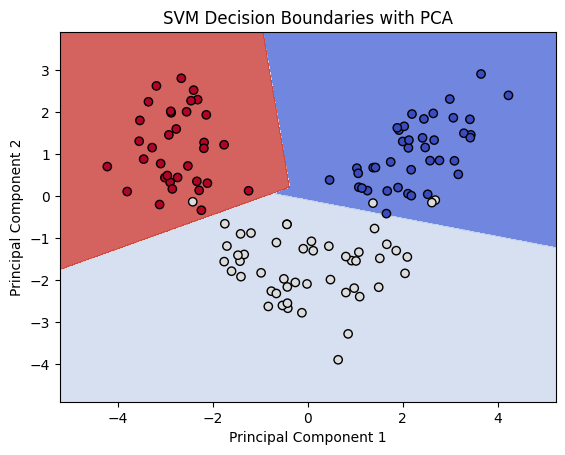

In [ ]:
#Step 3: Plot the Decision Boundaries
import matplotlib.pyplot as plt
import numpy as np

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the labels for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Scatter plot of training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("SVM Decision Boundaries with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
